In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import os
import datetime
import pandas as pd
import timeit

In [2]:
'''Micol'''
path_raw = '/Users/micol/Documents/Imperial/Year4/Master_Project/polypropylene' #path with raw spectra files

'''Rachel'''
#path_raw = 'D:/raw_spectra' #path containing all raw spectra
#path_log = 'D:/MSci_Full' #path containing full_log

full_log = 'poly_window_test1-20181218110622.log' #contains temperature and status of h/c BB target

In [3]:
all_the_files = np.array([i for i in os.listdir(path_raw) if os.path.isfile(os.path.join(path_raw,i)) and i.startswith('IC_raw_spectra_')]) #all files in directory starting with 'IC_raw_spectra'

def read_temperatures_check(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    temp1 = [float(b) for b in (lines[1].split())[6:]]
    tempHBB1 = temp1[0]
    return tempHBB1

delete_files = [f for f in all_the_files if read_temperatures_check(path_raw,f)==0.0] #files where there is no temperature measurement
file_array = [f.strip('IC_raw_spectra.tx') for f in all_the_files if f not in delete_files] #numbers of allowed file lists, in wrong order
file_integers = sorted([int(i) for i in file_array]) #number converted to sorted integers (not naturally done)

files_list = ['IC_raw_spectra_'+str(num)+'.txt' for num in file_integers] #final file list in order

In [4]:
"""retrieving times from files"""

def read_times(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    times = lines[0].split() #retrieve times of beginning of all spectra in a file
    return times

In [5]:
all_times_list = [] #final time list [374x4] (in HH:MM:SS.microsec format)

for f in range(len(files_list)): #go through files_list and extract times
    all_times_list.append(read_times(path_raw, files_list[f]))

flat_list = [item for sublist in all_times_list for item in sublist] #1D list of all times (in HH:MM:SS.microsec format)

spectrum_times = [] #final time list [(374*4)x1] in seconds from midnight format

for i in flat_list: #convert times to seconds format
    time = datetime.datetime.strptime(i, '%H:%M:%S.%f')
    spectrum_times.append((time.microsecond)/1000000 +time.second+time.minute*60+time.hour*3600)

Code up to this point returns: #edit

$\textbf{spectrum_times}$: a list of times of all spectra for which the temperature is not zero

$\textbf{files_list}$: a list of all raw files for which temperature is not zero

In [6]:
time_col_name = 'Time' # name the time column in all subsequent dataframes

In [7]:
def read_file(directory, filename, separator, head='infer'):
    """
    Reads an external file and outputs it as a Pandas Dataframe
    Input: Directory, Filename (Strings)
    Output: Pandas Dataframe
    """
    path=os.path.join(directory, filename)
    dataset = pd.read_csv(path, header = head, sep=separator)
    
    return dataset

In [8]:
# LOG FILE
# Importing file X with features Y Z
x = read_file(path_raw, full_log, separator=',', head=None)

y = x[[1,6,8,9,10,11]] # picking out relevant features

zz = y.loc[y[11] != 0] # removing zero-valued entries in column 11, the ones where it wasnt looking at hot or cold BB

log_file = zz.reset_index()

log_file.columns = ['a','Real Time', 'room_temp', 'hbb_temp','cbb_temp','Time','orientation'] #all the column names; 'f' is some value (0,225,270)
log_file['hc'] = np.nan #add empty column 'hc'
#log_file['temp_avg'] = np.nan #add empty column 'temp_avg'

log_file.loc[log_file['orientation'] == 270, 'hc'] = 'h' #if f=270, 'h'
log_file.loc[log_file['orientation'] == 225, 'hc'] = 'c'
#zz2.loc[zz2['hc'] == 'h', 'temp_avg'] == zz2.loc['hbb_temp']

log_file.drop('a', axis=1, inplace=True)

#log_file.loc[100, 'orientation']

In [9]:
log_file[80:]

,Real Time,room_temp,hbb_temp,cbb_temp,Time,orientation,hc
80,11:10:00,21.38,69.52,23.97,40201,225,c
81,11:10:03,21.39,69.52,23.98,40203,225,c
82,11:10:05,21.38,69.52,23.99,40205,225,c
83,11:10:07,21.38,69.52,23.99,40207,225,c
84,11:10:09,21.39,69.52,23.99,40209,225,c
85,11:10:11,21.38,69.52,23.99,40211,225,c
86,11:10:13,21.38,69.52,24.00,40213,225,c
87,11:10:15,21.38,69.52,24.00,40215,225,c
88,11:10:17,21.38,69.51,24.00,40218,225,c
89,11:10:19,21.39,69.52,24.01,40220,225,c


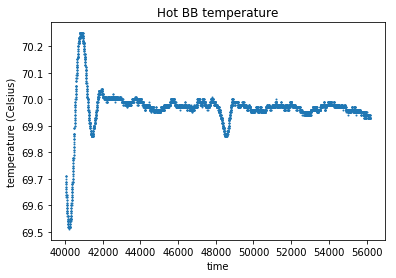

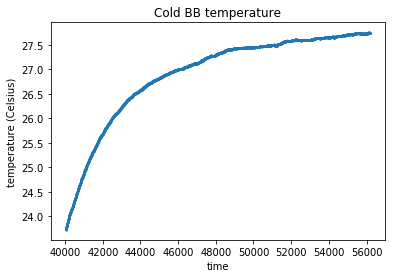

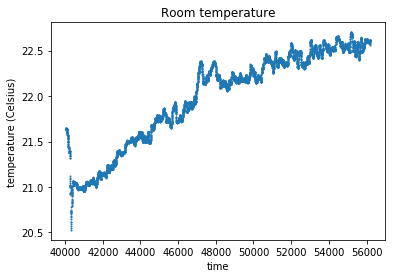

In [10]:
plt.scatter(log_file['Time'], log_file['hbb_temp'], s=1)
plt.title('Hot BB temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()
plt.scatter(log_file['Time'], log_file['cbb_temp'], s=1)
plt.title('Cold BB temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()
plt.scatter(log_file['Time'], log_file['room_temp'], s=1)
plt.title('Room temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()

In [11]:
'''insert_row inserts a row into a dataframe after a given index and then reindex all rows in ascending order'''

def insert_row(i, df, line):
    dfA = df.iloc[:i, ]
    dfB = df.iloc[i:, ]
    df = dfA.append(line).append(dfB).reset_index(drop = True) # Our code differs here
    return df

In [12]:
times_all = [i for i in spectrum_times] # select times when reading is stable
times = times_all[-4:0:-4] #only want every fourth spectrum
times.append(times_all[0])
times.sort(reverse = True) #need to insert rows into dataframe in reverse order in order not to get messed up with indices

In [13]:
#scan log_times, and insert spectra at corresponding times, with 'Nan' in the h_c column (by default)
log_times = log_file['Time']

for t in times:
    i=0
    if t > log_times[0]:
        while log_file.at[i, time_col_name] <= t:
            i += 1   
        line = pd.DataFrame([t], columns = [time_col_name])
        log_file = insert_row(i, log_file, line)
    else:
        line = pd.DataFrame([t], columns = [time_col_name])
        log_file = insert_row(i, log_file, line)

In [14]:
log_file.head()

,Real Time,Time,cbb_temp,hbb_temp,hc,orientation,room_temp
0,11:07:16,40036.000,23.72,69.71,h,270.0,21.65
1,11:07:18,40038.000,23.73,69.71,h,270.0,21.65
2,NaN,40039.811,NaN,NaN,NaN,NaN,NaN
3,11:07:20,40040.000,23.72,69.71,h,270.0,21.65
4,11:07:22,40042.000,23.73,69.70,h,270.0,21.65


In [15]:
hc_list = []
temps_avg = []
temps_std = []

#find last spectrum
d = log_file.index[-1]
while log_file.at[d, 'hc'] == 'c' or log_file.at[d, 'hc'] == 'h':
    d -=1   

for i in range(d-1):
    value = log_file.at[i, 'hc']
    if value != 'c' and value != 'h':
        hot_or_cold = log_file.iloc[i+1]['hc']
        hc_list.append(hot_or_cold) # the spectra are assigned the h_c value of the following time
        temp_list = []
        a=2
        if hot_or_cold == 'h':
            num = log_file.iloc[i+1]['hbb_temp']
            while m.isnan(num) == False:
                temp_list.append(num)
                num = log_file.iloc[i+a]['hbb_temp']
                a += 1
            temps_avg.append(np.average(temp_list))
            temps_std.append(np.std(temp_list))
        elif hot_or_cold == 'c':
            num = log_file.iloc[i+1]['cbb_temp']
            while m.isnan(num) == False:
                temp_list.append(num)
                num = log_file.iloc[i+a]['cbb_temp']
                a += 1
            temps_avg.append(np.average(temp_list))
            temps_std.append(np.std(temp_list))

In [16]:
times.sort() # now they are back in ascending order

final_frame_4 = pd.DataFrame(
    {'Time': times[:-1],
     'h_or_c': hc_list,
     'temp_avg': temps_avg,
     'temp_std': temps_std
    })

final_frame_4.head()

,Time,h_or_c,temp_avg,temp_std
0,40039.811,h,69.646552,0.032724
1,40097.604,h,69.562143,0.018585
2,40156.137,c,23.954286,0.024846
3,40213.943,c,24.042414,0.021440
4,40274.073,h,69.562759,0.017200


In [17]:
h = 6.626e-34
c = 3.0e+8
k = 1.381e-23

planck_a = 2*h*(c**2)
planck_e = h*c/k

def planck(wavenumber, T): # T in Kelvin, wavenumber in cm^-1
    radiance = 100*planck_a*((wavenumber*100)**3)/(np.exp(planck_e*(wavenumber*100)/T)-1)
    return radiance #returns radiance in $W m^{-2} sr^{-1} (cm^{-1})^{-1}$

In [18]:
def read_wavenumbers(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    wns = []
    for i in lines[5:]:
        line = i.split()
        split_lines = [float(a) for a in line]
        wns.append(split_lines[0])
    return wns

raw_wavenumbers = read_wavenumbers(path_raw, files_list[0]) #all wavenumbers are the same in all files so just need to read from the first file
wavenums = raw_wavenumbers

In [19]:
def read_all_raw_spectra(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list

    sp1 = []
    sp2 = []
    sp3 = []
    sp4 = []
    
    for i in lines[5:]:
        line = i.split()
        split_lines = [float(a) for a in line]
        sp1.append(split_lines[1])
        sp2.append(split_lines[2])
        sp3.append(split_lines[3])
        sp4.append(split_lines[4])
    avg_4_spec = 0.25*(np.array(sp1) + np.array(sp2) + np.array(sp3) + np.array(sp4))
    
    return avg_4_spec #list of raw value as function of wavenumber averaged over the 4 spectra

average_all_4_spectra = [read_all_raw_spectra(path_raw, files_list[f]) for f in range(len(files_list)-1)] #list of 352 elements, which is a list of 8000 points averaged over the 4 spectra
average_4_spectra = average_all_4_spectra

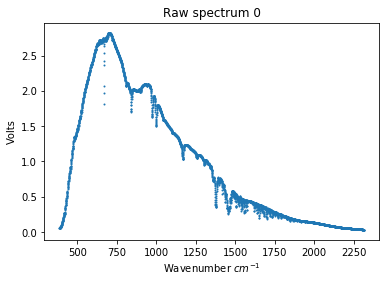

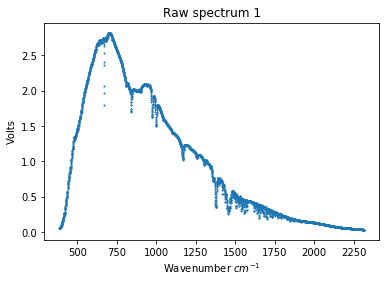

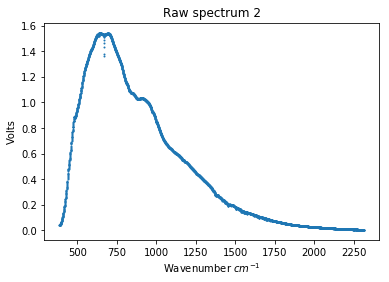

In [20]:
# Plot a raw spectrum
def raw_spectrum_plot(num): #num = the spectrum you want to plot (0 to 272)
    plt.scatter(wavenums, average_4_spectra[num], s=1)
    plt.title('Raw spectrum ' + str(num))
    plt.xlabel('Wavenumber $cm^{-1}$')
    plt.ylabel('Volts')
    plt.show()

raw_spectrum_plot(0)
raw_spectrum_plot(1)
raw_spectrum_plot(2)

In [21]:
def response_fn(spectrum_number): #returns the response function at some time and wavenumber
    
    (a,b) = (average_4_spectra[spectrum_number], average_4_spectra[spectrum_number + 1])
    if a[1000] < b[1000]:
        V_c = a
        V_h = b
    else:
        V_c = b
        V_h = a
        
    V_diff = np.array(V_h)-np.array(V_c)
    
    (e,f) = (final_frame_4.at[spectrum_number,'temp_avg'], final_frame_4.at[spectrum_number+1,'temp_avg'])
    if e<f:
        temp_average_c = e
        temp_average_h = f
    else:
        temp_average_c = f
        temp_average_h = e

    radiances_avg_h = [planck(wn, temp_average_h+273.15) for wn in wavenums]
    radiances_avg_c = [planck(wn, temp_average_c+273.15) for wn in wavenums]
    rad_diff = np.array(radiances_avg_h) - np.array(radiances_avg_c)
    
    def division(raw_val,planck_val):
        if planck_val == 0:
            div = 0
        else:
            div = raw_val/planck_val
        return div
    
    division_vec = np.vectorize(division)
    ratio = division_vec(V_diff, rad_diff)
    
    return(ratio)

In [22]:
indices = np.arange(1, 271, 2)     #array of every other (odd) index, starting at n=1, cold
all_resp_functions = [response_fn(i) for i in indices]  #list of arrays of response functions available to plot, list length=175, array lengths=4001

diff_resp_functions = [i - all_resp_functions[-1] for i in np.array(all_resp_functions)]

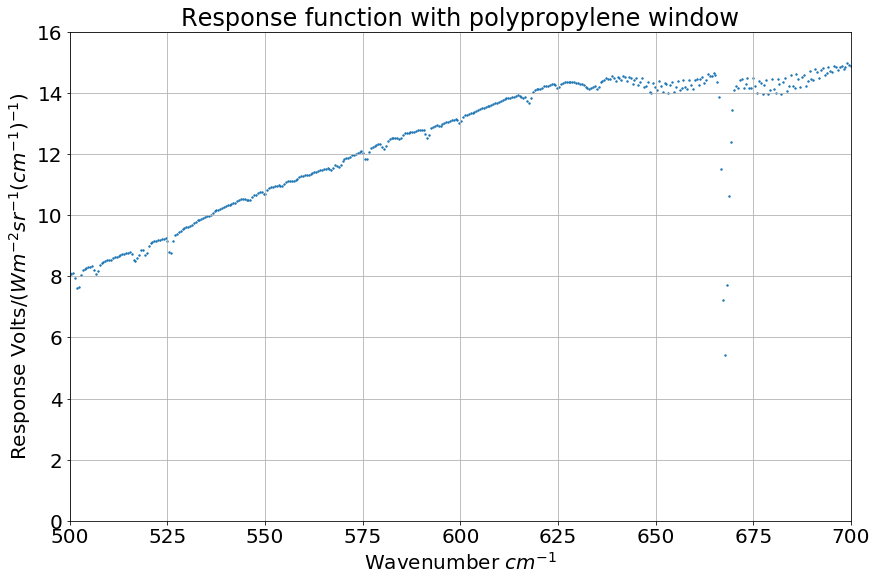

In [61]:
n=130
fig = plt.figure(figsize=(14,9))
plt.scatter(wavenums, all_resp_functions[n], s=2)
plt.title('Response function with polypropylene window', fontsize=24) #for spectrum {}'.format(n)
plt.xlabel('Wavenumber $cm^{-1}$', fontsize=20)
plt.ylabel('Response Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)', fontsize=20)
plt.tick_params(labelsize=20, labelcolor='black')
plt.grid()
plt.ylim((0,16))
fig.savefig('Graphs/Sample_resp_function_polypropylene.png', dpi=600)
plt.show()

In [24]:
print(len(wavenums))
print(len(times[:-2:2]))
print(len(all_resp_functions))

4001
136
135


Note more dark vertical lines compared to regular window... polypropylene absorption lines?

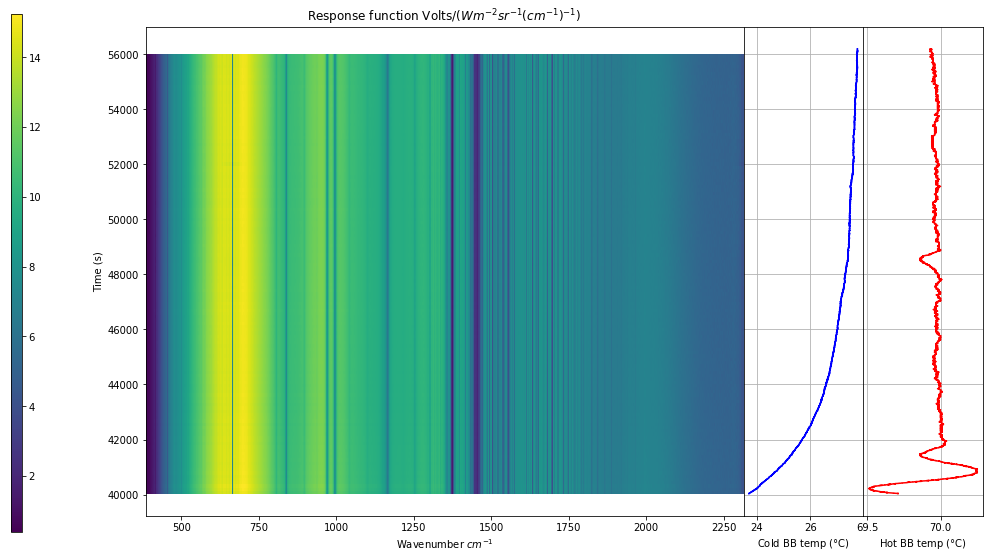

In [25]:
grid = plt.GridSpec(1, 7, wspace=0)

fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(grid[0,:5])
p = ax1.pcolor(wavenums, times[:-2:2], all_resp_functions)
plt.title('Response function Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)')
plt.xlabel('Wavenumber $cm^{-1}$')
plt.ylabel('Time (s)')
cbaxes = fig.add_axes([0, 0.1, 0.01, .8]) 
cb = fig.colorbar(p, cax = cbaxes)

ax2 = fig.add_subplot(grid[0,5:6], sharey = ax1)
ax2.plot(log_file['cbb_temp'], log_file['Time'], 'b')
plt.grid()
plt.xlabel('Cold BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

ax3 = fig.add_subplot(grid[0,6:7], sharey = ax1)
ax3.plot(log_file['hbb_temp'], log_file['Time'], 'r')
plt.grid()
plt.xlabel('Hot BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

plt.show()

Lots of new absorption features due to new window

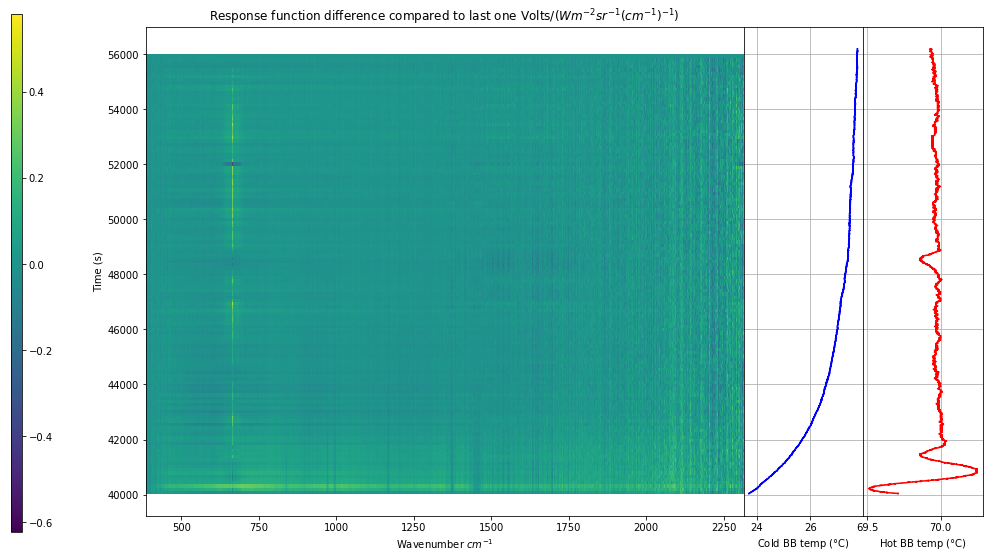

In [26]:
grid = plt.GridSpec(1, 7, wspace=0)

fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(grid[0,:5])
p = ax1.pcolor(wavenums, times[:-2:2], diff_resp_functions)
plt.title('Response function difference compared to last one Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)')
plt.xlabel('Wavenumber $cm^{-1}$')
plt.ylabel('Time (s)')
cbaxes = fig.add_axes([0, 0.1, 0.01, .8]) 
cb = fig.colorbar(p, cax = cbaxes)

ax2 = fig.add_subplot(grid[0,5:6], sharey = ax1)
ax2.plot(log_file['cbb_temp'], log_file['Time'], 'b')
plt.grid()
plt.xlabel('Cold BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

ax3 = fig.add_subplot(grid[0,6:7], sharey = ax1)
ax3.plot(log_file['hbb_temp'], log_file['Time'], 'r')
plt.grid()
plt.xlabel('Hot BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

plt.show()

Dark horizontal line corresponds to dip in temperature of hot BB

importing Jupyter notebook from data_analysis.ipynb


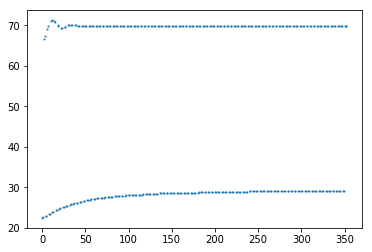

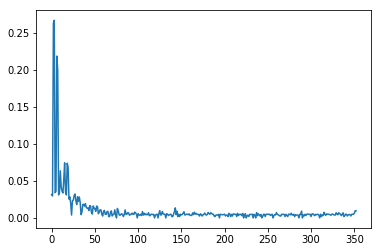

Time 12:37:58.496
Average temp 22.579642857142858
Temperature Std 0.02969874250069263


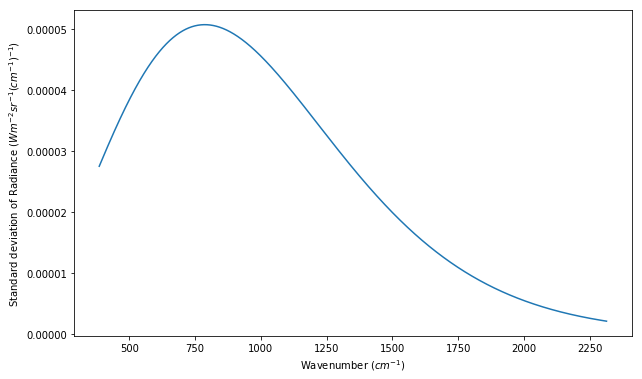

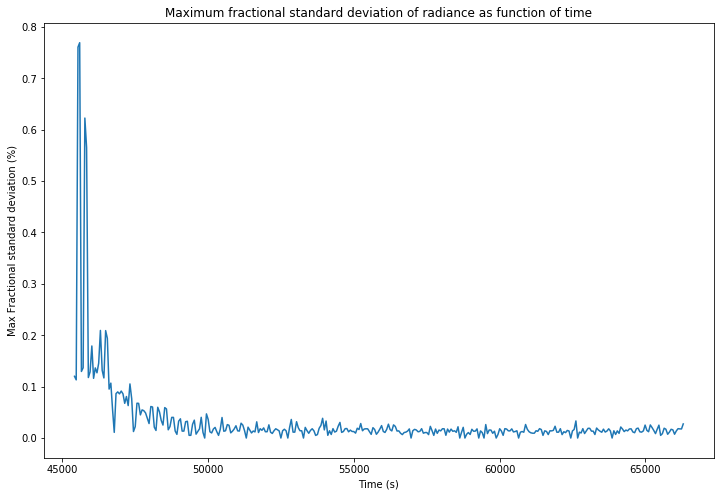

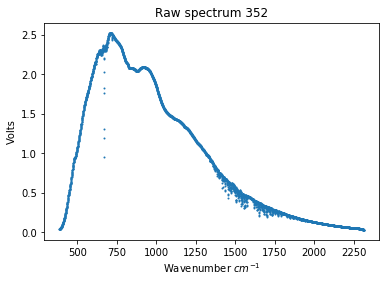

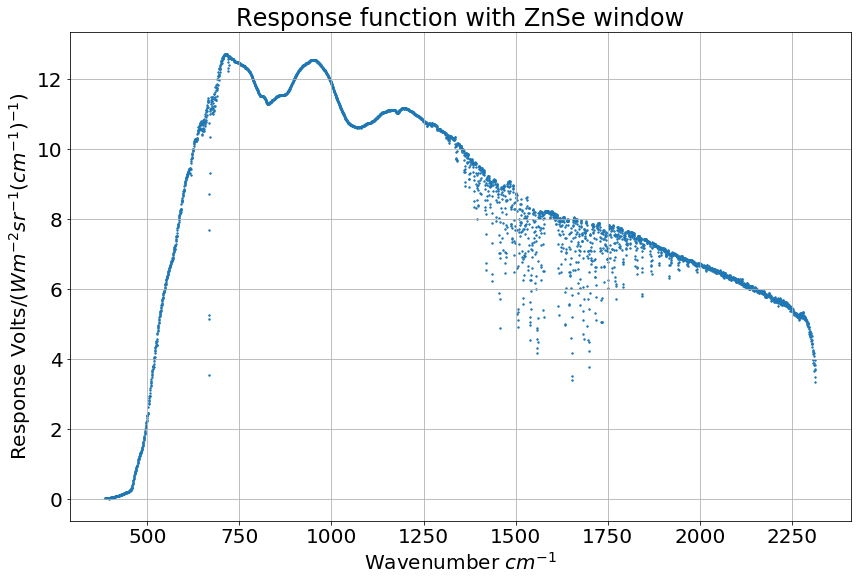

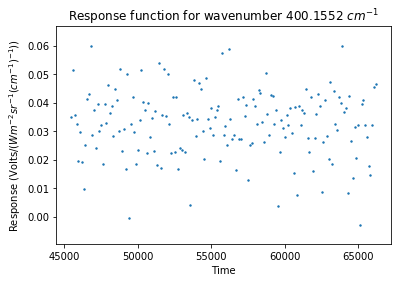

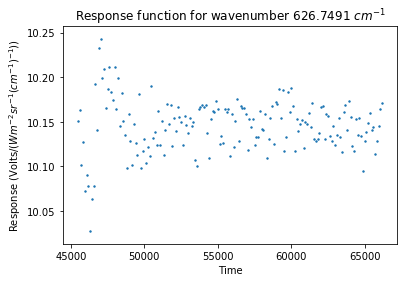

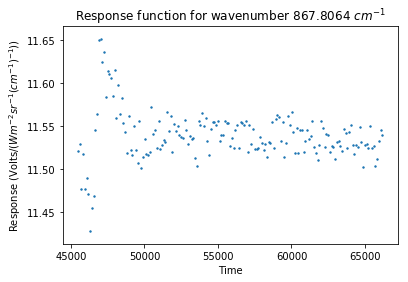

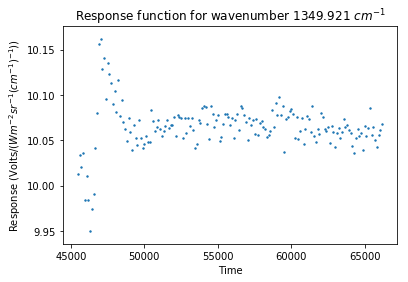

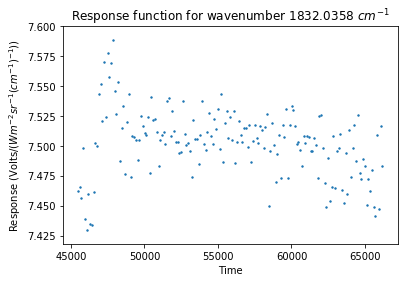

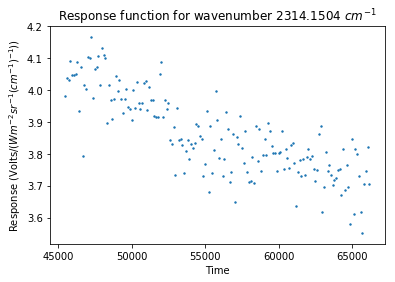

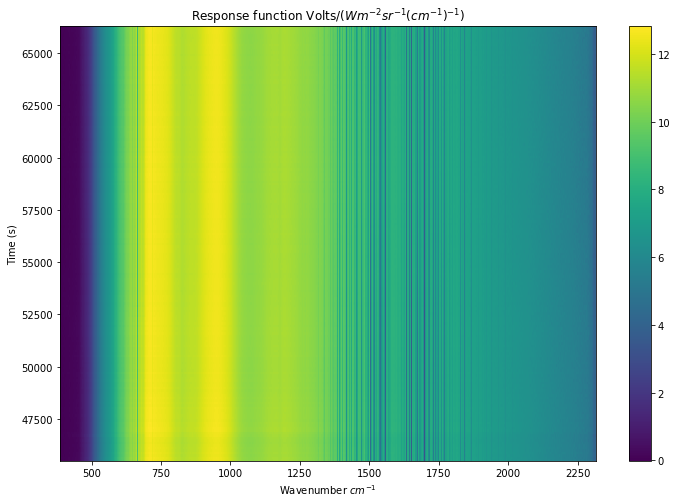

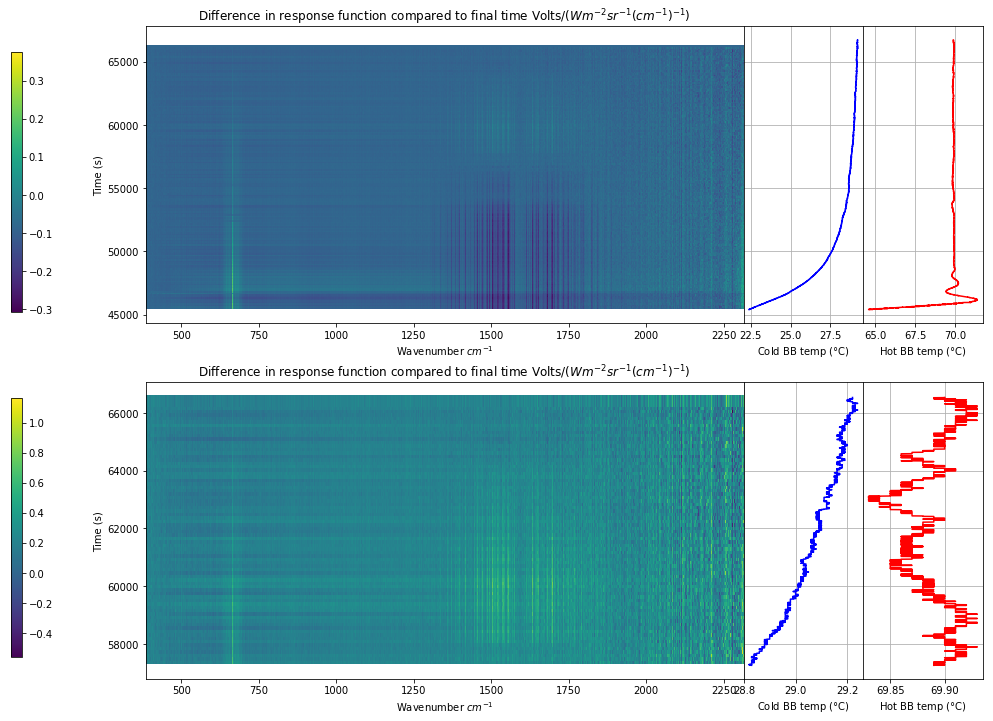

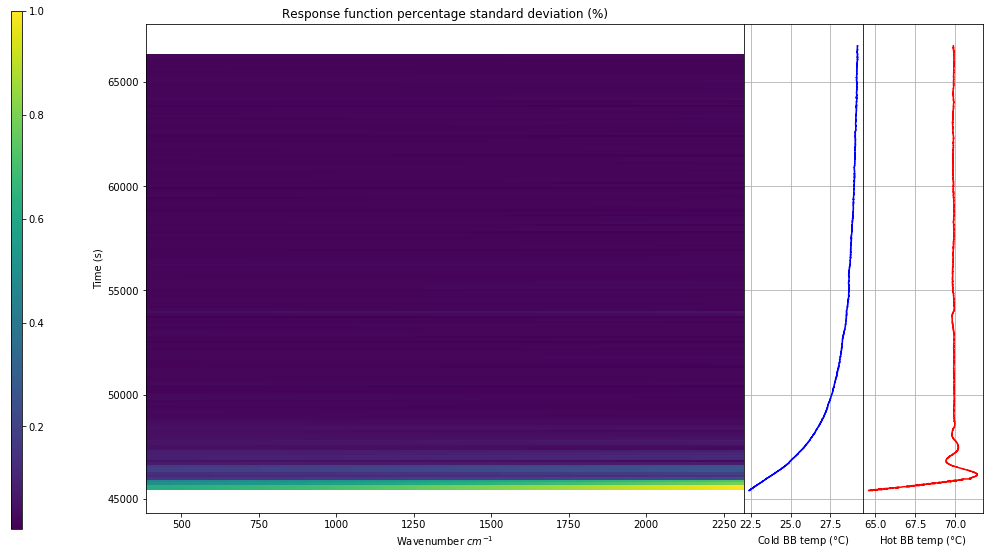

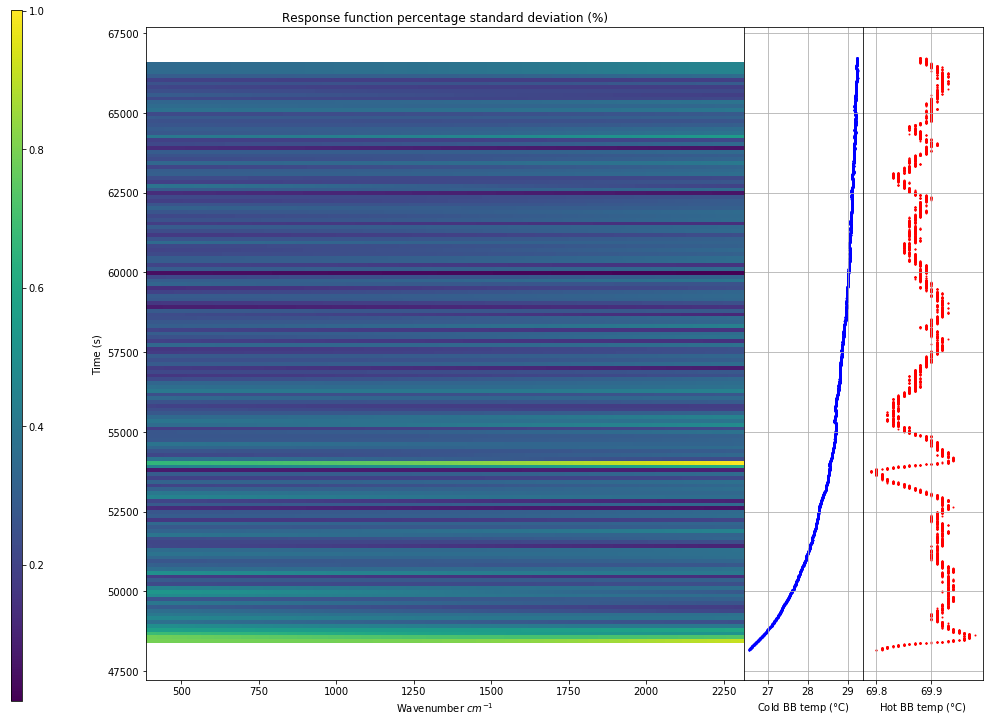

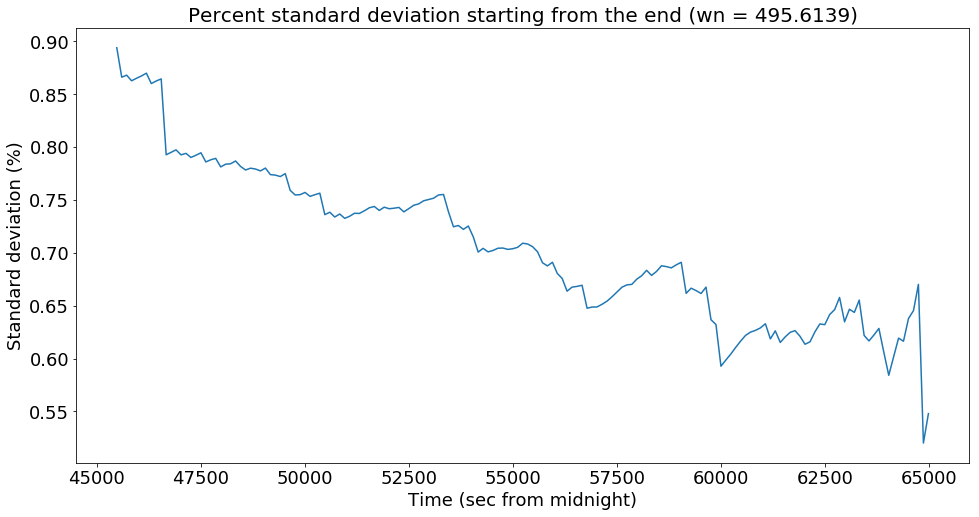

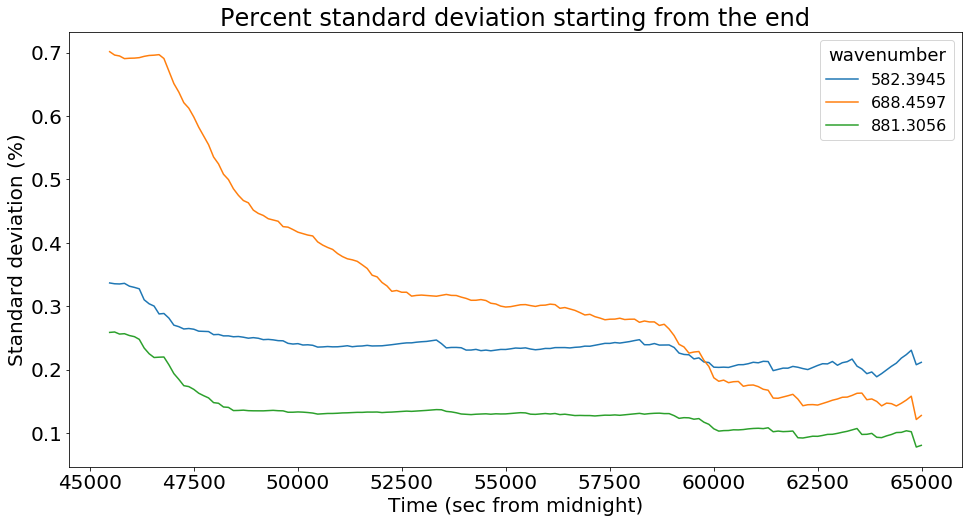

NameError: name 'all_stds_from_back' is not defined

In [27]:
import import_ipynb
from data_analysis import all_resp_functions as rf

In [28]:
# Plot difference in response for last response measurements which are assumed to be the most stable
plt.figure(figsize=(16, 10))
plt.plot(wavenums, all_resp_functions[-1]- rf[-1])
plt.axhline(y=0, color='grey')
plt.grid()
plt.xticks(np.arange(400, 2400, 100))
plt.title('Difference between polypropylene response and regular window response', fontsize=18)
plt.ylabel('Response difference (Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$))', fontsize=18)
plt.xlabel('Wavenumber $cm^{-1}$', fontsize=18)
plt.show()

NameError: name 'rf' is not defined

NB this is compared to measurements before realignment

Polypropylene absorption spectrum

<img src="files/poly_spectrum.png">

ZnSe transmission spectrum

<img src="files/ZnSe_spectrum.png">

In [ ]:
from data_analysis_after_realignment import all_stable_resp_functions as rf_realigned

In [ ]:
# Difference in response bnetween poly and measuremtns after realignment for last response measurements which are assumed to be the most stable
fig = plt.figure(figsize=(16,10))
plt.plot(wavenums, all_resp_functions[-1]- rf_realigned[-1])
plt.axhline(y=0, color='grey')
plt.grid()
plt.xticks(np.arange(400, 2400, 100))
plt.title('Difference in response between polypropylene and ZnSe window', fontsize=20)
plt.ylabel('Response difference (Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$))', fontsize=20)
plt.xlabel('Wavenumber $cm^{-1}$', fontsize=20)
plt.tick_params(labelsize=14, labelcolor='black')
fig.savefig('Graphs/Resp_function_difference.png', dpi=600)
plt.show()

<img src="files/poly_spectrum.png">

Ask Jon if he has a nicer graph from a textbook. Otherwise use software to trace the graph

<img src="files/traced_poly.png">

In [ ]:
# Difference between polypropylene response and regular window response after realignment as fraction of regular window response for last response measurements which are assumed to be the most stable
fig = plt.figure(figsize=(14,9))
plt.scatter(wavenums, [(a - b) / b for a,b in zip(all_resp_functions[-1], rf_realigned[-1])], s=2)
plt.grid()
plt.xticks(np.arange(400, 2400, 100))
plt.title('Fractional difference in response between polypropylene and ZnSe', fontsize=20)
plt.ylabel('Response difference (Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$))', fontsize=20)
plt.xlabel('Wavenumber $cm^{-1}$', fontsize=20)
plt.tick_params(labelsize=14, labelcolor='black')
fig.savefig('Graphs/Resp_function_difference_fraction.png', dpi=600)
plt.show()

In [ ]:
# We want to find dR/dt and see if it's realted to dT/dt
# choose a wavenumber for which resonse function in pretty high

wn_df = pd.DataFrame(
    {'Wavenumber': wavenums,
    })

wn_df.head()

In [ ]:
def get_dRdt(wavenumber):
    i=0
    while wn_df.at[i, 'Wavenumber'] < wavenumber:  
        i += 1
    index = i
    wn_responses = []
    for array in all_resp_functions:
        wn_responses.append(array[index])
    print(len(wn_responses))    
    return wn_responses, wn_df.at[i, 'Wavenumber']

(wn_responses, exact_wn) = get_dRdt(700)

In [ ]:
from scipy import optimize

def linear_func(x, m, b):
    return m*x+b

num = 5 # number of points to consider for the linear fit
num1 = 100
dRdt = [] #temp_hot_slope
DTdt_hot = [] #temp_cold_slope

for i in range(len(wn_responses)-num):
    params, cov = optimize.curve_fit(linear_func, times[:-2:2][i: i+num], wn_responses[i:i+num])
    dRdt.append(params[0]) #append all the slope values
'''    
for i in range(len(log_file['hbb_temp'])-num1):
    params1, cov1 = optimize.curve_fit(linear_func, times[::2][i: i+num1], log_file['hbb_temp'][i:i+num1])
    DTdt_hot.append(params1[0]) #append all the slope values
'''
plt.figure(figsize=(10,6))

plt.scatter(times[:-2-num-7:2], dRdt) #check why this 7 is necessary
plt.title('dR/dt for wavenumber '+str(exact_wn) +'$cm^{-1}$ over 10 minute interval', fontsize=14)
plt.ylabel('dR/dt ($W m^{-2} sr^{-1} (cm^{-1})^{-1}$ / second)')
plt.xlabel('Time')
plt.ylim((-.001,.001))
'''
plt.figure(figsize=(10,6))

plt.scatter(times[:num-7:2], DTdt_hot)
plt.title('dT_hot/dt for wavenumber', fontsize=14)
plt.ylabel('Slope')
plt.xlabel('Time')
'''
plt.show()

In [ ]:
# the polypropylene measurements were started after temperature had stabilised pretty well so dR/dt is approx. constant and it doesn't make sense to do an analysis of standard deviation

In [58]:
ZnSe_transmission = pd.read_csv('ZnSe_Transmission_data.csv')
z = [ 1/row.Wavelength*10000  for index, row in ZnSe_transmission.iterrows()]
ZnSe_transmission['Wavenumber(cm-1)'] = z
ZnSe_transmission = ZnSe_transmission.sort_values('Wavenumber(cm-1)')

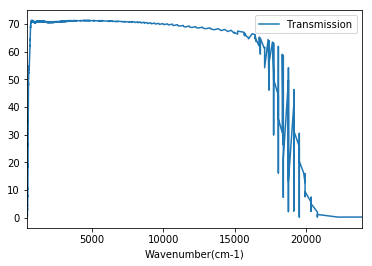

In [60]:
ZnSe_transmission.plot(x='Wavenumber(cm-1)', y='Transmission')
plt.show()